# Метод дихотомии

In [1]:
xmin = -10;
xmax = 10;
ymin = -10;
ymax = 10;

In [5]:
f[x_] := x^3 - 9*x^2 + 23*x - 15

-Graphics-
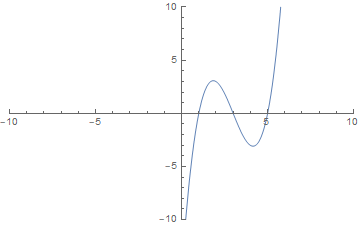

In [6]:
Plot[f[x], {x, xmin, xmax}, PlotRange->{{xmin, xmax}, {ymin, ymax}}]

In [7]:
a = 0;
b = 2;
eps = 0.00001;
res = "None";
tmpa = a;
tmpb = b;

On interval a=0 b=2 root x=1.


-Graphics-
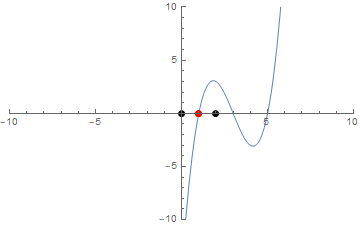

In [13]:
If[TautologyQ[N[f[a]*f[b]]>0], Null, 
    If[TautologyQ[N[Abs[f[(a+b)/2]]]<eps], 
        Null,
        While[TautologyQ[N[(b-a)]>eps],
                median=N[(a + b) / 2]; 
                a = If[N[f[b]]*N[f[median]]<0,N[median],N[a]]; 
                b = If[N[f[b]]*N[f[median]]<0,N[b],N[median]];]];
    res = N[(a+b)/2];]
If[TautologyQ[N[Abs[f[res]]] < eps], Null, res="None"];
Print["On interval a=", tmpa, " b=", tmpb, " root x=", res]
deadlines = {{tmpa, 0}, {tmpb, 0}};
g1 = Plot[f[x], {x, xmin, xmax}, PlotRange->{{xmin, xmax}, {ymin, ymax}}];
g2 = ListPlot[deadlines, PlotStyle->{Black, PointSize[Large]}];
g3 = ListPlot[{{res,0}}, PlotStyle->{Red, PointSize[Large]}];
If[TautologyQ[res!="None"],Show[{g1, g2, g3}], Show[{g1, g2}]]

# Метод Ньютона

In [21]:
xmin = -10;
xmax = 10;
ymin = -10;
ymax = 10;

In [25]:
f[x_] := x^3 - 9*x^2 + 23*x - 15

-Graphics-
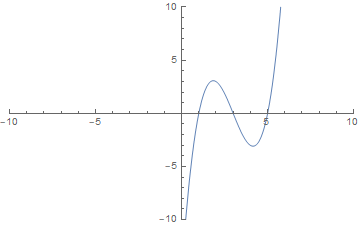

In [26]:
Plot[f[x], {x, xmin, xmax}, PlotRange->{{xmin, xmax}, {ymin, ymax}}]

In [27]:
a = 0;
b = 2;
eps = 0.00001;

On interval a=0 b=2 root x=1.


-Graphics-
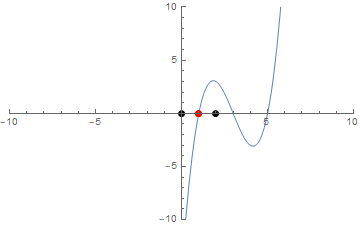

In [30]:
x1 = a;
x2 = (a+b)/2;
While[TautologyQ[N[Abs[x2-x1]]>eps], 
         x1=x2;
         x2=x1-f[x1]/f'[x1];]
x1 = N[x1];
If[TautologyQ[N[Abs[f[x1]]]<eps], Null, x1="None"];
Print["On interval a=", a, " b=", b, " root x=", x1]
If[TautologyQ[x1!="None"], g3=ListPlot[{{N[x1],0}}, PlotStyle->{Red, PointSize[Large]}], Null];
deadlines = {{a, 0}, {b, 0}};
g1 = Plot[f[x], {x, xmin, xmax}, PlotRange->{{xmin, xmax}, {ymin, ymax}}];
g2 = ListPlot[deadlines, PlotStyle->{Black, PointSize[Large]}];
g3 = ListPlot[{{x1,0}}, PlotStyle->{Red, PointSize[Large]}];
If[TautologyQ[res!="None"],Show[{g1, g2, g3}], Show[{g1, g2}]]

# Получение НОД

Задание функций и получение gcd(f,g) через стандартный PolynomialGCD

In [42]:
f[x_] = x^4 - 4*x^3 + 7*x^2 - 5*x + 1;
g[x_] = x^5 - x^4 - x^3 + x^2 + 5*x - 5;
wolframgcd = PolynomialGCD[f[x], g[x]];

Начальная инициализация

In [45]:
xval = 1;
xxval = 0;
yval = 0;
yyval = 1;

Копируем наши функции

In [49]:
f1[x_] = f[x];
f2[x_] = g[x];

Вычисляем коэффициенты тождества Безу(xval,yval) и f1=gcd(f, g)

In [51]:
While[TautologyQ[Length[CoefficientList[f2[x], x]] != 0], 
        q=PolynomialQuotient[f1[x], f2[x], x];
        r=PolynomialRemainder[f1[x], f2[x], x];
        f1[x_]=f2[x];
        f2[x_]=r;
        tmpx=xval;
        tmpy=yval;
        xval=xxval;
        xxval=tmpx-xxval*q;
        yval=yyval;
        yyval=tmpy-yyval*q;
]

Проверяем тождество Безу и сохраняем наш gcd(f,g)

In [52]:
Simplify[f1[x]] == Simplify[f[x]*xval+yval*g[x]]
mygcd = Simplify[f[x]*xval+yval*g[x]];

True

Наш gcd(f,g) отличается от стандратного только на константу, найдем ее и поделим наш gcd(f,g) на нее

In [54]:
myconst = mygcd / wolframgcd;
mygcd = mygcd / myconst;

Видим что в результате собственно полученный gcd(f,g) равен gcd(f,g) полученному при помощи PolynomialGCD

In [56]:
mygcd
wolframgcd
mygcd == wolframgcd

-1 + x
-1 + x
True